In [1]:
import os
import os.path as op
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy.ma as ma
from scipy import stats

## Age data

In [32]:
file_list = [] # This is going to be the list of all filenames that will be included in the analysis

path = '~/Desktop/temp_storage/MPT_ECM_Breakdown_Data/csvs/' # The folder where the Deff csv files are located

ages = ['P14', 'P21', 'P28', 'P35']
slices = 3
vids = 5

for age in ages:
    for slic in range(1, slices+1):
        for vid in range(1, vids+1):
            file_list.append('{}_40nm_s{}_v{}'.format(age, slic, vid))

In [33]:
file_list

['P14_40nm_s1_v1',
 'P14_40nm_s1_v2',
 'P14_40nm_s1_v3',
 'P14_40nm_s1_v4',
 'P14_40nm_s1_v5',
 'P14_40nm_s2_v1',
 'P14_40nm_s2_v2',
 'P14_40nm_s2_v3',
 'P14_40nm_s2_v4',
 'P14_40nm_s2_v5',
 'P14_40nm_s3_v1',
 'P14_40nm_s3_v2',
 'P14_40nm_s3_v3',
 'P14_40nm_s3_v4',
 'P14_40nm_s3_v5',
 'P21_40nm_s1_v1',
 'P21_40nm_s1_v2',
 'P21_40nm_s1_v3',
 'P21_40nm_s1_v4',
 'P21_40nm_s1_v5',
 'P21_40nm_s2_v1',
 'P21_40nm_s2_v2',
 'P21_40nm_s2_v3',
 'P21_40nm_s2_v4',
 'P21_40nm_s2_v5',
 'P21_40nm_s3_v1',
 'P21_40nm_s3_v2',
 'P21_40nm_s3_v3',
 'P21_40nm_s3_v4',
 'P21_40nm_s3_v5',
 'P28_40nm_s1_v1',
 'P28_40nm_s1_v2',
 'P28_40nm_s1_v3',
 'P28_40nm_s1_v4',
 'P28_40nm_s1_v5',
 'P28_40nm_s2_v1',
 'P28_40nm_s2_v2',
 'P28_40nm_s2_v3',
 'P28_40nm_s2_v4',
 'P28_40nm_s2_v5',
 'P28_40nm_s3_v1',
 'P28_40nm_s3_v2',
 'P28_40nm_s3_v3',
 'P28_40nm_s3_v4',
 'P28_40nm_s3_v5',
 'P35_40nm_s1_v1',
 'P35_40nm_s1_v2',
 'P35_40nm_s1_v3',
 'P35_40nm_s1_v4',
 'P35_40nm_s1_v5',
 'P35_40nm_s2_v1',
 'P35_40nm_s2_v2',
 'P35_40nm_s

In [34]:
# Assigning variables
k = 1.3806503e-23 # m^2 kg s^-2 K
#T = 310.15 # K
T = 293.15 # K
mu = 0.001 # kg m^-1 s^-1

r_s = 26 # nm
r_f = 0.3 # nm

Do = k*T/(6*math.pi*mu*r_s*1e-9)*1e12 # um^2/s
print(Do)

8.25846094056375


In [23]:
Deff_vals_P14 = pd.DataFrame()

for file in file_list[0:15]:
    temp = pd.read_csv(path+'{}_Deff.csv'.format(file))
    Deff_vals_P14 = pd.concat([Deff_vals_P14, temp], ignore_index=True)

Deff_vals_P14.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_P14['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_P14['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_P14 = Deff_vals_P14.dropna()
Deff_vals_P14 = Deff_vals_P14.reset_index(drop=True)

Deff_vals_P21 = pd.DataFrame()

for file in file_list[15:30]:
    temp = pd.read_csv(path+'{}_Deff.csv'.format(file))
    Deff_vals_P21 = pd.concat([Deff_vals_P21, temp], ignore_index=True)

Deff_vals_P21.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_P21['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_P21['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_P21 = Deff_vals_P21.dropna()
Deff_vals_P21 = Deff_vals_P21.reset_index(drop=True)

Deff_vals_P28 = pd.DataFrame()

for file in file_list[30:45]:
    temp = pd.read_csv(path+'{}_Deff.csv'.format(file))
    Deff_vals_P28 = pd.concat([Deff_vals_P28, temp], ignore_index=True)

Deff_vals_P28.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_P28['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_P28['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_P28 = Deff_vals_P28.dropna()
Deff_vals_P28 = Deff_vals_P28.reset_index(drop=True)

Deff_vals_P35 = pd.DataFrame()

for file in file_list[45:60]:
    temp = pd.read_csv(path+'{}_Deff.csv'.format(file))
    Deff_vals_P35 = pd.concat([Deff_vals_P35, temp], ignore_index=True)

Deff_vals_P35.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_P35['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_P35['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_P35 = Deff_vals_P35.dropna()
Deff_vals_P35 = Deff_vals_P35.reset_index(drop=True)

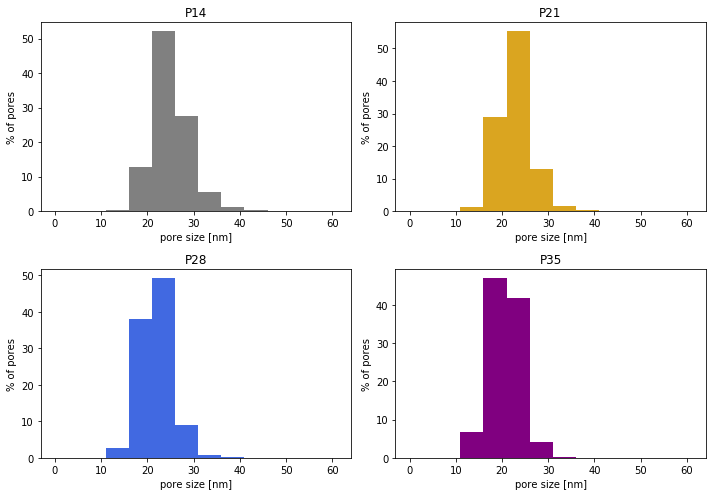

In [10]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(2,2,1)
ax = Deff_vals_P14["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_P14.index) / len(Deff_vals_P14.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61], color='grey')
#ax.xaxis.set_ticks(np.arange(0, 41, 5))
#ax.yaxis.set_ticks(np.arange(0, 76, 10))
ax.set_ylabel('% of pores')
ax.set_xlabel('pore size [nm]')
ax.set_title('P14')
ax2 = fig.add_subplot(2,2,2)
ax2 = Deff_vals_P21["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_P21.index) / len(Deff_vals_P21.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61], color='goldenrod')
#ax2.xaxis.set_ticks(np.arange(0, 41, 5))
#ax2.yaxis.set_ticks(np.arange(0, 76, 10))
ax2.set_ylabel('% of pores')
ax2.set_xlabel('pore size [nm]')
ax2.set_title('P21')
ax3 = fig.add_subplot(2,2,3)
ax3 = Deff_vals_P28["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_P28.index) / len(Deff_vals_P28.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61], color='royalblue')
#ax3.xaxis.set_ticks(np.arange(0, 41, 5))
#ax3.yaxis.set_ticks(np.arange(0, 76, 10))
ax3.set_ylabel('% of pores')
ax3.set_xlabel('pore size [nm]')
ax3.set_title('P28')
ax4 = fig.add_subplot(2,2,4)
ax4 = Deff_vals_P35["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_P35.index) / len(Deff_vals_P35.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61], color='purple')
#ax4.xaxis.set_ticks(np.arange(0, 41, 5))
#ax4.yaxis.set_ticks(np.arange(0, 76, 10))
ax4.set_ylabel('% of pores')
ax4.set_xlabel('pore size [nm]')
ax4.set_title('P35')
plt.tight_layout()

In [16]:
print(max(Deff_vals_P14["Pore size [nm]"]),', ',Deff_vals_P14["Pore size [nm]"].mean())
print(max(Deff_vals_P21["Pore size [nm]"]),', ',Deff_vals_P21["Pore size [nm]"].mean())
print(max(Deff_vals_P28["Pore size [nm]"]),', ',Deff_vals_P28["Pore size [nm]"].mean())
print(max(Deff_vals_P35["Pore size [nm]"]),', ',Deff_vals_P35["Pore size [nm]"].mean())

56.78000211957867 ,  25.07496940061418
57.49652044280216 ,  22.791144086598635
40.9641347256327 ,  21.90945835070198
39.14085285484682 ,  20.814689590741608


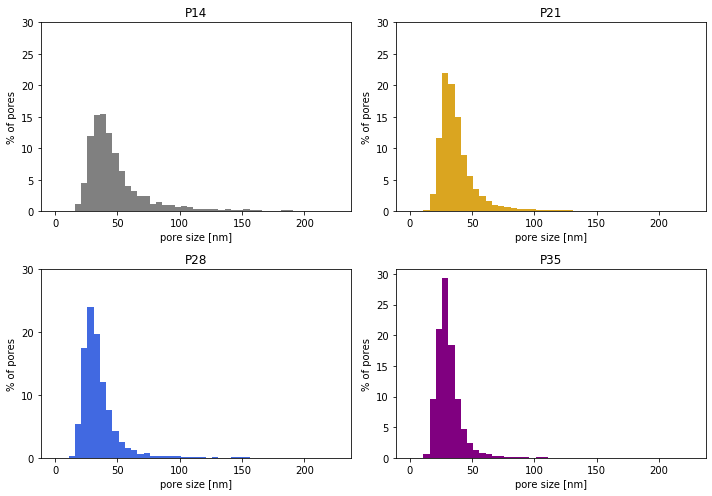

In [30]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(2,2,1)
ax = Deff_vals_P14["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_P14.index) / len(Deff_vals_P14.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106,111,116,121,126,131,136,141,146,151,156,161,166,171,176,181,186,191,196,201,206,211,216,221,226],color='grey')
#ax.xaxis.set_ticks(np.arange(0, 101, 5))
ax.yaxis.set_ticks(np.arange(0, 31, 5))
ax.set_ylabel('% of pores')
ax.set_xlabel('pore size [nm]')
ax.set_title('P14')
ax2 = fig.add_subplot(2,2,2)
ax2 = Deff_vals_P21["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_P21.index) / len(Deff_vals_P21.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106,111,116,121,126,131,136,141,146,151,156,161,166,171,176,181,186,191,196,201,206,211,216,221,226], color='goldenrod')
#ax2.xaxis.set_ticks(np.arange(0, 101, 5))
ax2.yaxis.set_ticks(np.arange(0, 31, 5))
ax2.set_ylabel('% of pores')
ax2.set_xlabel('pore size [nm]')
ax2.set_title('P21')
ax3 = fig.add_subplot(2,2,3)
ax3 = Deff_vals_P28["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_P28.index) / len(Deff_vals_P28.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106,111,116,121,126,131,136,141,146,151,156,161,166,171,176,181,186,191,196,201,206,211,216,221,226], color='royalblue')
#ax3.xaxis.set_ticks(np.arange(0, 41, 5))
ax3.yaxis.set_ticks(np.arange(0, 31, 10))
ax3.set_ylabel('% of pores')
ax3.set_xlabel('pore size [nm]')
ax3.set_title('P28')
ax4 = fig.add_subplot(2,2,4)
ax4 = Deff_vals_P35["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_P35.index) / len(Deff_vals_P35.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106,111,116,121,126,131,136,141,146,151,156,161,166,171,176,181,186,191,196,201,206,211,216,221,226], color='purple')
#ax4.xaxis.set_ticks(np.arange(0, 41, 5))
ax4.yaxis.set_ticks(np.arange(0, 31, 5))
ax4.set_ylabel('% of pores')
ax4.set_xlabel('pore size [nm]')
ax4.set_title('P35')
plt.tight_layout()

In [31]:
print(min(Deff_vals_P14["Pore size [nm]"]),',', max(Deff_vals_P14["Pore size [nm]"]),',',Deff_vals_P14["Pore size [nm]"].mean())
print(min(Deff_vals_P21["Pore size [nm]"]),',', max(Deff_vals_P21["Pore size [nm]"]),',',Deff_vals_P21["Pore size [nm]"].mean())
print(min(Deff_vals_P28["Pore size [nm]"]),',', max(Deff_vals_P28["Pore size [nm]"]),',',Deff_vals_P28["Pore size [nm]"].mean())
print(min(Deff_vals_P35["Pore size [nm]"]),',', max(Deff_vals_P35["Pore size [nm]"]),',',Deff_vals_P35["Pore size [nm]"].mean())

15.624180075591136 , 2417.8156225338716 , 52.882381758122726
13.383660510964516 , 5853.287253178988 , 40.28336886908672
13.987433242327414 , 1915.3512346109671 , 36.87221680339161
12.574157983165293 , 1149.5452145476413 , 31.69575738885269


In [26]:
pro_50 = 0
pro_100 = 0
pro_200 = 0
total = len(Deff_vals_P14)

for traj in range(0,total):
    if Deff_vals_P14['Pore size [nm]'][traj] >= 50:
        pro_50 += 1
        if Deff_vals_P14['Pore size [nm]'][traj] >= 100:
            pro_100 += 1
            if Deff_vals_P14['Pore size [nm]'][traj] >= 200:
                pro_200 += 1

                
percent_50 = pro_50/total*100
percent_100 = pro_100/total*100
percent_200 = pro_200/total*100

In [27]:
print(percent_50)
print(percent_100)
print(percent_200)

31.3204146011717
6.399278954484002
1.1942316358720144


## Treated Data

In [35]:
file_list = [] # This is going to be the list of all filenames that will be included in the analysis

path = '~/Desktop/temp_storage/MPT_ECM_Breakdown_Data/csvs/' # The folder where the Deff csv files are located

ages = ['ChABC', 'HYase', 'NT']
brains = 4

for age in ages:
    for brain in range(1, brains+1):
        file_list.append('{}_brain_{}_stats'.format(age, brain))

In [39]:
file_list

['ChABC_brain_1_stats',
 'ChABC_brain_2_stats',
 'ChABC_brain_3_stats',
 'ChABC_brain_4_stats',
 'HYase_brain_1_stats',
 'HYase_brain_2_stats',
 'HYase_brain_3_stats',
 'HYase_brain_4_stats',
 'NT_brain_1_stats',
 'NT_brain_2_stats',
 'NT_brain_3_stats',
 'NT_brain_4_stats']

In [37]:
# Assigning variables
k = 1.3806503e-23 # m^2 kg s^-2 K
#T = 310.15 # K
T = 293.15 # K
mu = 0.001 # kg m^-1 s^-1

r_s = 26 # nm
r_f = 0.3 # nm

Do = k*T/(6*math.pi*mu*r_s*1e-9)*1e12 # um^2/s
print(Do)

8.25846094056375


In [41]:
Deff_vals_NT = pd.DataFrame()

for file in file_list[8:12]:
    temp = pd.read_csv(path+'{}.csv'.format(file))
    Deff_vals_NT = pd.concat([Deff_vals_NT, temp], ignore_index=True)

Deff_vals_NT.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_NT['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_NT['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_NT = Deff_vals_NT.dropna()
Deff_vals_NT = Deff_vals_NT.reset_index(drop=True)

Deff_vals_ChABC = pd.DataFrame()

for file in file_list[0:4]:
    temp = pd.read_csv(path+'{}.csv'.format(file))
    Deff_vals_ChABC = pd.concat([Deff_vals_ChABC, temp], ignore_index=True)

Deff_vals_ChABC.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_ChABC['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_ChABC['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_ChABC = Deff_vals_ChABC.dropna()
Deff_vals_ChABC = Deff_vals_ChABC.reset_index(drop=True)

Deff_vals_HYase = pd.DataFrame()

for file in file_list[4:8]:
    temp = pd.read_csv(path+'{}.csv'.format(file))
    Deff_vals_HYase = pd.concat([Deff_vals_HYase, temp], ignore_index=True)

Deff_vals_HYase.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_HYase['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_HYase['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_HYase = Deff_vals_HYase.dropna()
Deff_vals_HYase = Deff_vals_HYase.reset_index(drop=True)

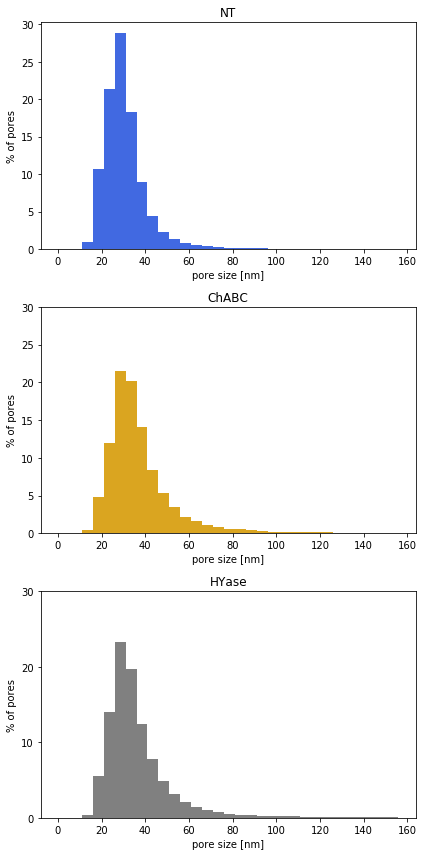

In [57]:
fig = plt.figure(figsize = (6,12))
ax = fig.add_subplot(3,1,1)
ax = Deff_vals_NT["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_NT.index) / len(Deff_vals_NT.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106,111,116,121,126,131,136,141,146,151,156],color='royalblue')
#ax.xaxis.set_ticks(np.arange(0, 101, 5))
ax.yaxis.set_ticks(np.arange(0, 31, 5))
ax.set_ylabel('% of pores')
ax.set_xlabel('pore size [nm]')
ax.set_title('NT')
ax2 = fig.add_subplot(3,1,2)
ax2 = Deff_vals_ChABC["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_ChABC.index) / len(Deff_vals_ChABC.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106,111,116,121,126,131,136,141,146,151,156], color='goldenrod')
#ax2.xaxis.set_ticks(np.arange(0, 101, 5))
ax2.yaxis.set_ticks(np.arange(0, 31, 5))
ax2.set_ylabel('% of pores')
ax2.set_xlabel('pore size [nm]')
ax2.set_title('ChABC')
ax3 = fig.add_subplot(3,1,3)
ax3 = Deff_vals_HYase["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_HYase.index) / len(Deff_vals_HYase.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106,111,116,121,126,131,136,141,146,151,156], color='grey')
#ax3.xaxis.set_ticks(np.arange(0, 41, 5))
ax3.yaxis.set_ticks(np.arange(0, 31, 10))
ax3.set_ylabel('% of pores')
ax3.set_xlabel('pore size [nm]')
ax3.set_title('HYase')
#ax4 = fig.add_subplot(2,2,4)
#ax4 = Deff_vals_NT["Pore size [nm]"].plot.hist(weights = [np.ones_like(Deff_vals_NT.index) / len(Deff_vals_NT.index)*100, np.ones_like(Deff_vals_ChABC.index) / len(Deff_vals_ChABC.index)*100, np.ones_like(Deff_vals_HYase.index) / len(Deff_vals_HYase.index)*100], bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106,111,116,121,126,131,136,141,146,151,156], color=['royalblue', 'goldenrod', 'grey'], alpha = 0.5)
#ax4 = Deff_vals_NT["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_NT.index) / len(Deff_vals_NT.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106,111,116,121,126,131,136,141,146,151,156], color='royalblue', alpha = 0.5)
#ax4 = Deff_vals_ChABC["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_ChABC.index) / len(Deff_vals_ChABC.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106,111,116,121,126,131,136,141,146,151,156] ,color='goldenrod', alpha = 0.5)
#ax4 = Deff_vals_HYase["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_HYase.index) / len(Deff_vals_HYase.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,101,106,111,116,121,126,131,136,141,146,151,156], color='grey', alpha = 0.5)
#ax4.xaxis.set_ticks(np.arange(0, 41, 5))
#ax4.yaxis.set_ticks(np.arange(0, 31, 5))
#ax4.set_ylabel('% of pores')
#ax4.set_xlabel('pore size [nm]')
#ax4.set_title('P35')
plt.tight_layout()

In [58]:
print(min(Deff_vals_NT["Pore size [nm]"]),',', max(Deff_vals_NT["Pore size [nm]"]),',',Deff_vals_NT["Pore size [nm]"].mean())
print(min(Deff_vals_ChABC["Pore size [nm]"]),',', max(Deff_vals_ChABC["Pore size [nm]"]),',',Deff_vals_ChABC["Pore size [nm]"].mean())
print(min(Deff_vals_HYase["Pore size [nm]"]),',', max(Deff_vals_HYase["Pore size [nm]"]),',',Deff_vals_HYase["Pore size [nm]"].mean())

12.433891860598449 , 1294.0186797918484 , 31.137705986293525
12.797237731078264 , 10402.97120007566 , 39.80254994963769
12.484756934619517 , 8037.912689996186 , 38.546608855396336


In [63]:
pro_50 = 0
pro_100 = 0
pro_200 = 0
total = len(Deff_vals_HYase)

for traj in range(0,total):
    if Deff_vals_HYase['Pore size [nm]'][traj] >= 50:
        pro_50 += 1
        if Deff_vals_HYase['Pore size [nm]'][traj] >= 100:
            pro_100 += 1
            if Deff_vals_HYase['Pore size [nm]'][traj] >= 200:
                pro_200 += 1

                
percent_50 = pro_50/total*100
percent_100 = pro_100/total*100
percent_200 = pro_200/total*100

In [64]:
print(percent_50)
print(percent_100)
print(percent_200)

12.96049785350594
1.873606442810077
0.39934773203767177
